In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q1). Download the MNIST dataset from https://huggingface.co/datasets/mnist. Use a
random set of 1000 images (100 from each class 0-9) as your dataset.
* i. Write a piece of code to run the PCA algorithm on this data-set. Visualize the
images of the principal components that you obtain. How much of the variance
in the data-set is explained by each of the principal components?

In [47]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mnist.csv")

In [48]:
X=data.drop(columns=['label'])
y=data['label']

In [49]:
# Select 100 samples per class (0-9)
selected_indices = []
for digit in range(10):
    indices = np.where(y == digit)[0]
    selected_indices.extend(random.sample(list(indices), 100))

X_subset = X.loc[selected_indices]
y_subset = y.loc[selected_indices]


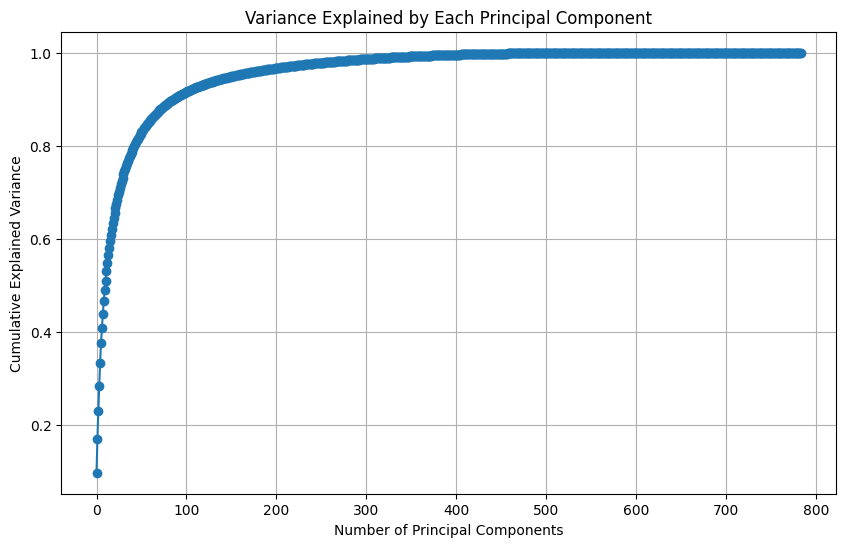

In [50]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

def project_data(X, eigenvectors, num_components):
    top_eigenvectors = eigenvectors[:, :num_components]
    return np.dot(X, top_eigenvectors)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()


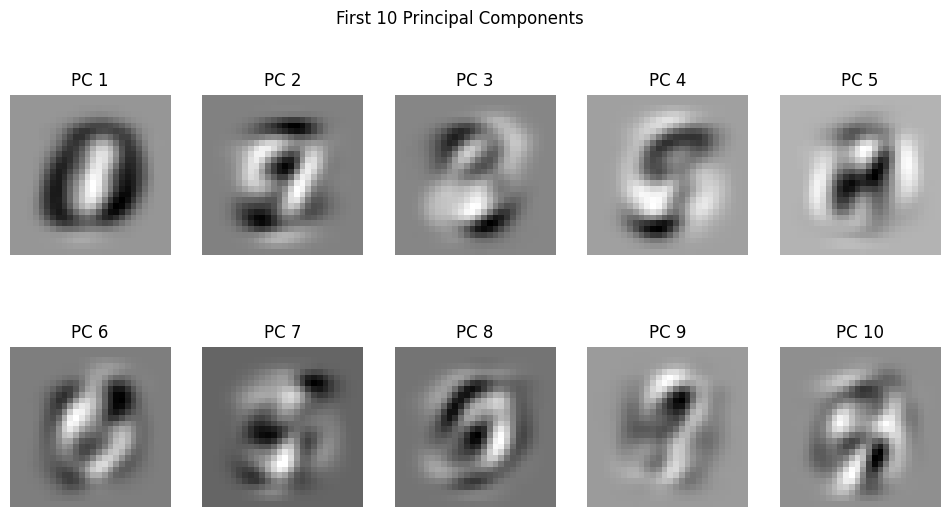

In [51]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenvectors[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'PC {i+1}')
    ax.axis('off')
plt.suptitle('First 10 Principal Components')
plt.show()

In [52]:
cov_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]

total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

print("Explained Variance for Each Principal Component:")
for i, ev in enumerate(explained_variance_ratio[:150], start=1):
    print(f"Principal Component {i}: {ev:.4f} ({ev * 100:.2f}%) of variance explained")

cumulative_variance = np.cumsum(explained_variance_ratio)

print("\nCumulative Variance:")
for i, cv in enumerate(cumulative_variance[:150], start=1):
    print(f"First {i} components: {cv:.4f} ({cv * 100:.2f}%)")


Explained Variance for Each Principal Component:
Principal Component 1: 0.0975 (9.75%) of variance explained
Principal Component 2: 0.0716 (7.16%) of variance explained
Principal Component 3: 0.0615 (6.15%) of variance explained
Principal Component 4: 0.0538 (5.38%) of variance explained
Principal Component 5: 0.0489 (4.89%) of variance explained
Principal Component 6: 0.0430 (4.30%) of variance explained
Principal Component 7: 0.0328 (3.28%) of variance explained
Principal Component 8: 0.0289 (2.89%) of variance explained
Principal Component 9: 0.0277 (2.77%) of variance explained
Principal Component 10: 0.0235 (2.35%) of variance explained
Principal Component 11: 0.0210 (2.10%) of variance explained
Principal Component 12: 0.0206 (2.06%) of variance explained
Principal Component 13: 0.0170 (1.70%) of variance explained
Principal Component 14: 0.0169 (1.69%) of variance explained
Principal Component 15: 0.0158 (1.58%) of variance explained
Principal Component 16: 0.0148 (1.48%) of var

*  ii. Reconstruct the dataset using diferent dimensional representations. How do these
 look like? If you had to pick a dimension d that can be used for a downstream
 task where you need to classify the digits correctly, what would you pick and
 why?

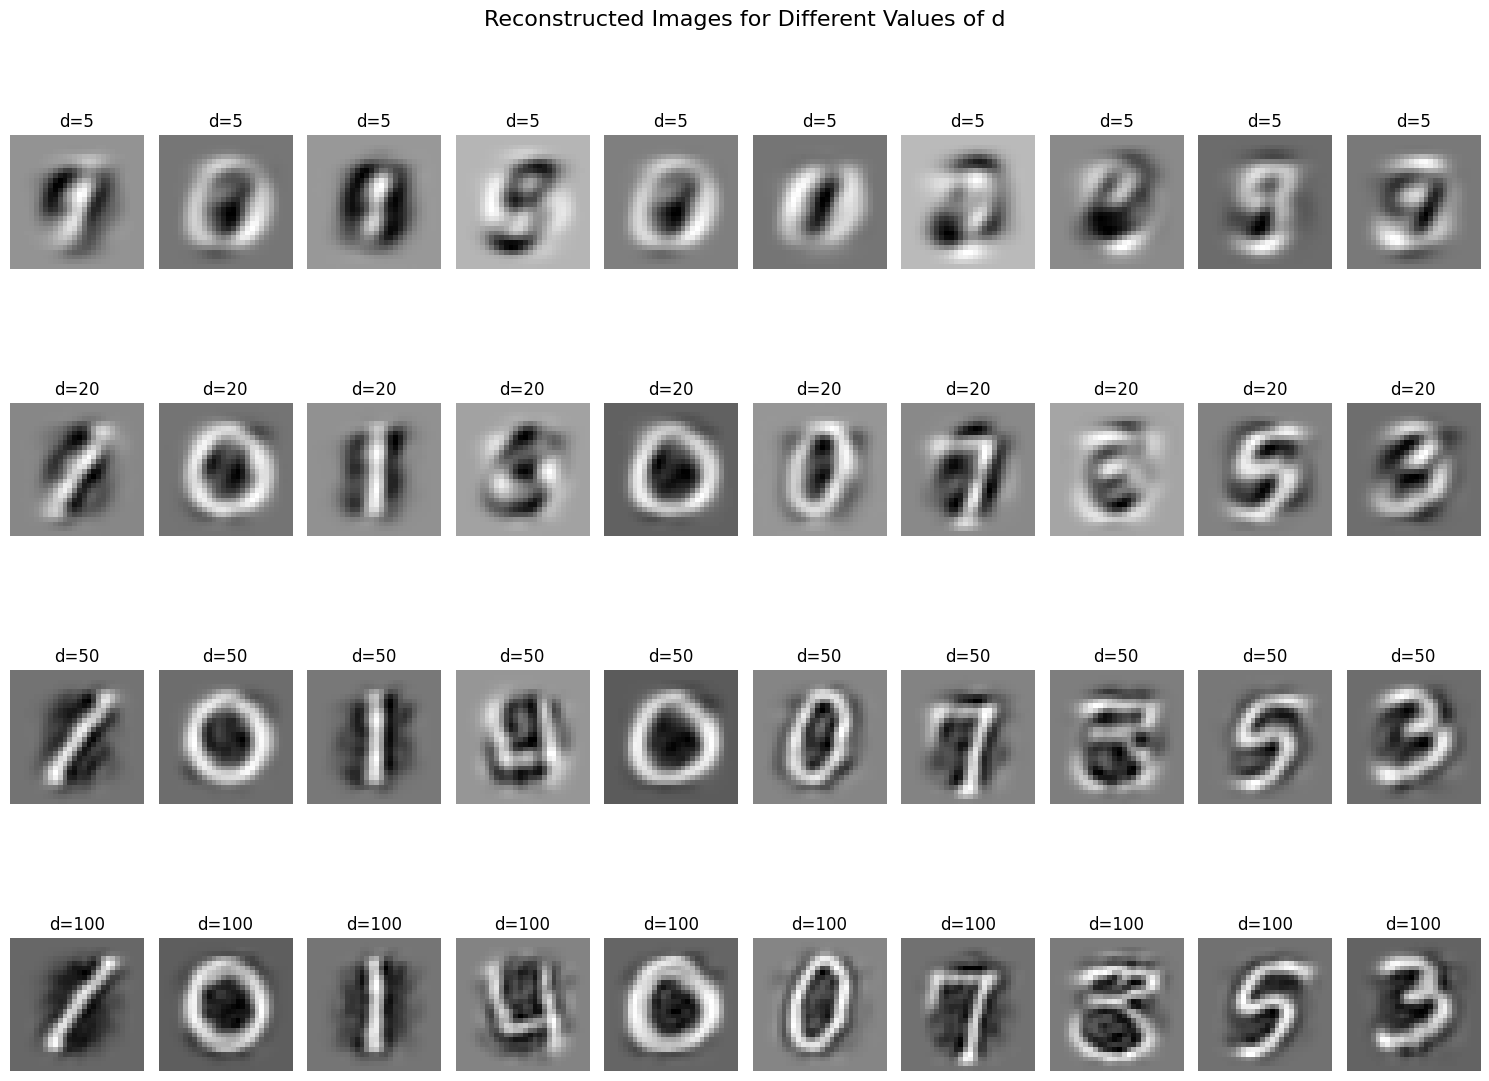

In [56]:
X_centered = X - np.mean(X, axis=0)
def reconstruct_data(X, eigenvectors, d):
    top_eigenvectors = eigenvectors[:, :d]
    X_reduced = np.dot(X, top_eigenvectors)
    X_reconstructed = np.dot(X_reduced, top_eigenvectors.T)
    return X_reconstructed

dims = [5, 20, 50, 100]
fig, axes = plt.subplots(len(dims), 10, figsize=(15, len(dims)*3))

for row, d in enumerate(dims):
    X_reconstructed = reconstruct_data(X_centered, eigenvectors, d)
    for i in range(10):
        ax = axes[row, i]
        ax.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"d={d}")
        ax.axis('off')

plt.suptitle('Reconstructed Images for Different Values of d', fontsize=16)
plt.tight_layout()
plt.show()

(2) You are given a data-set with 1000 data points each in R2(cm dataset 2.csv).
* i. Write a piece of code to implement the Llyod”s algorithm for the K-means prob-
lem with k = 2 . Try 5 different random initialization and plot the error function
w.r.t iterations in each case. In each case, plot the clusters obtained in different
colors.


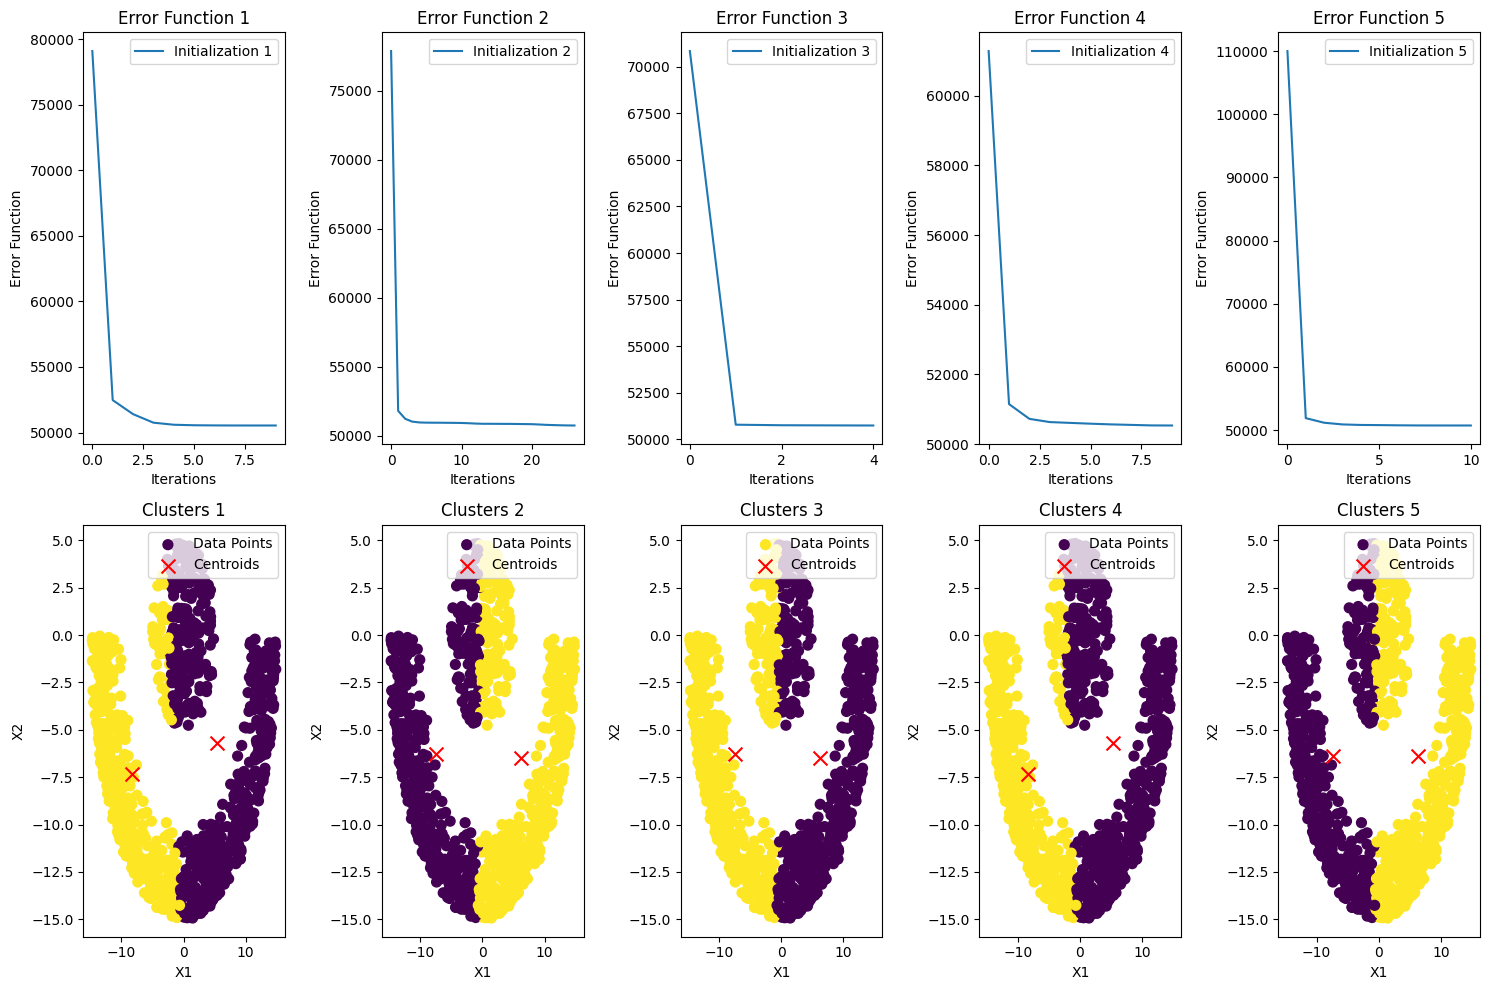

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cm_dataset_2.csv', header=None)
X = df.to_numpy()


def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def kmeans(X, k, max_iter=100, tol=1e-4):
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    prev_centroids = centroids.copy()
    error_function = []

    for _ in range(max_iter):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        error = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(k)])
        error_function.append(error)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels, error_function


k = 2
num_initializations = 5

plt.figure(figsize=(15, 10))

for i in range(num_initializations):
    centroids, labels, error_function = kmeans(X, k)
    plt.subplot(2, 5, i+1)
    plt.plot(error_function, label=f'Initialization {i+1}')
    plt.xlabel('Iterations')
    plt.ylabel('Error Function')
    plt.title(f'Error Function {i+1}')
    plt.legend()

    plt.subplot(2, 5, i+6)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'Clusters {i+1}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


* ii.  For each K = {2,3,4,5} ,Fixanarbitrary initialization and obtain cluster centers
 according to K-means algorithm using the xed initialization. For each value of
 K, plot the Voronoi regions associated to each cluster center. (You can assume the
 minimum and maximum value in the data-set to be the range for each component
 of R2)

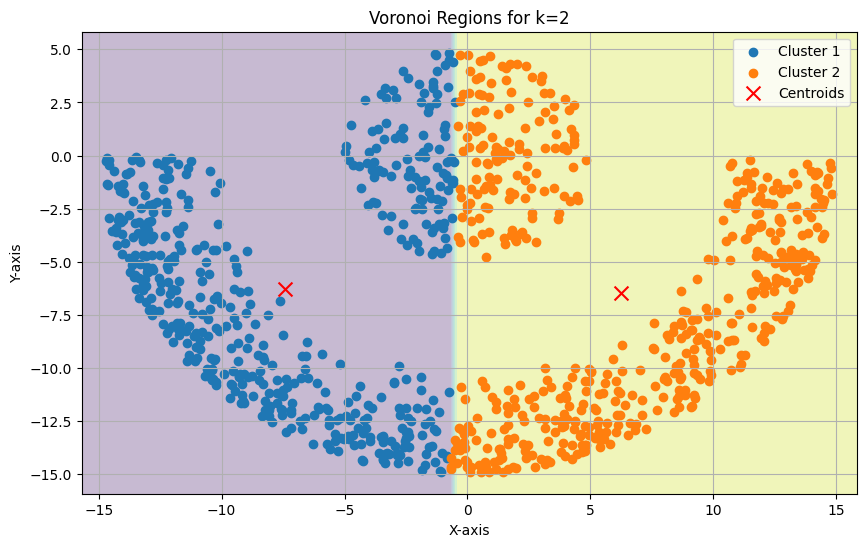

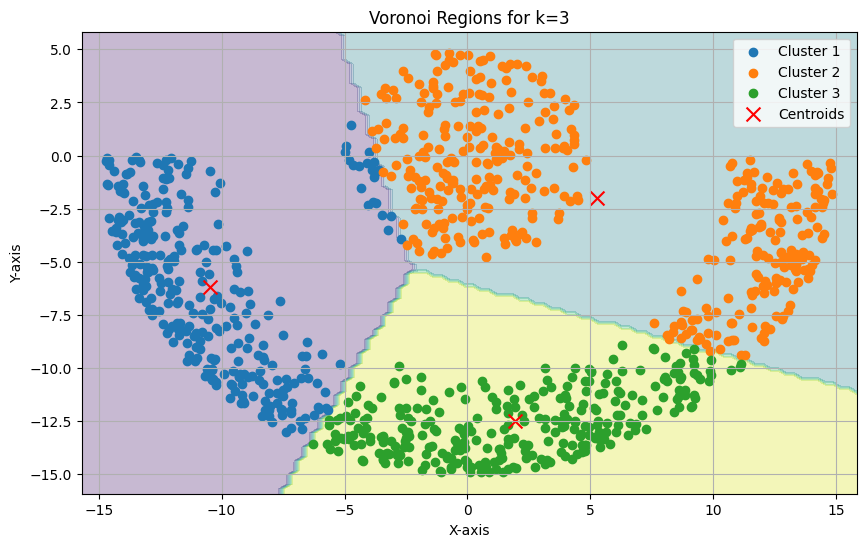

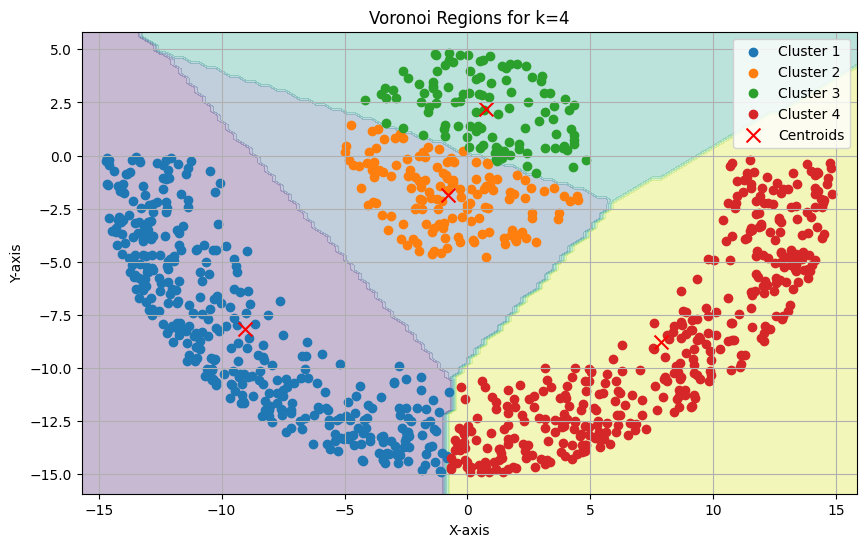

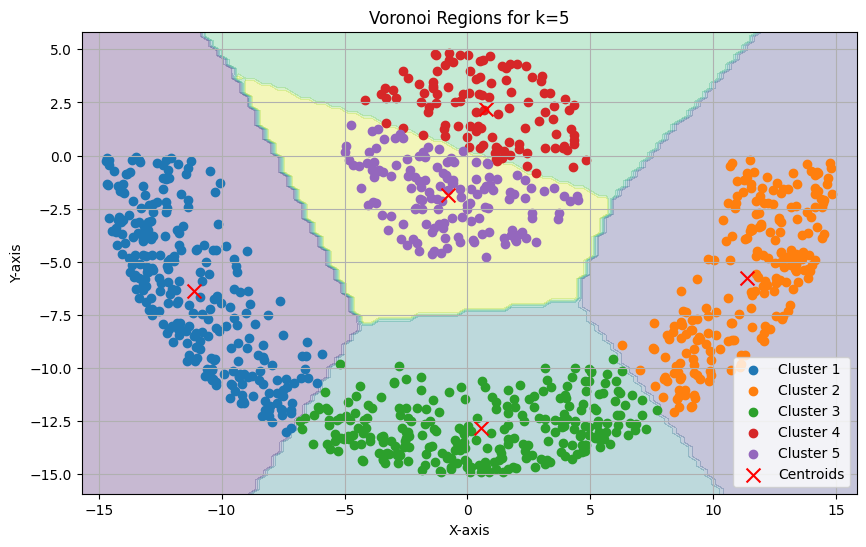

In [39]:
def kmeans_fixed(X, k, init_centers, max_iters=100):
    centers = init_centers.copy()
    for _ in range(max_iters):

        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centers = []
        for i in range(k):
            cluster_points = X[labels == i]
            if cluster_points.size > 0:
                new_centers.append(cluster_points.mean(axis=0))
            else:
                new_centers.append(centers[i])

        new_centers = np.array(new_centers)
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return centers, labels

def plot_voronoi(X, k, centers, labels):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    distances = np.linalg.norm(grid_points[:, np.newaxis] - centers, axis=2)
    grid_labels = np.argmin(distances, axis=1)

    grid_labels = grid_labels.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, grid_labels, alpha=0.3, cmap='viridis')

    for i in range(k):
        plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], label=f'Cluster {i + 1}')

    plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label='Centroids')
    plt.title(f'Voronoi Regions for k={k}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid()
    plt.show()

fixed_initializations = {
    2: np.array([[1, 1], [5, 5]]),
    3: np.array([[1, 1], [10, 10], [3, 2]]),
    4: np.array([[1, 2], [4, 5], [3, 8], [7, 4]]),
    5: np.array([[1, 7], [6, 5], [5, 2], [6, 6], [4, 4]])
}

for k in range(2, 6):
    init_centers = fixed_initializations[k]
    centers, labels = kmeans_fixed(X, k, init_centers)
    plot_voronoi(X, k, centers, labels)


*  iii. Is the Llyods algorithm a good way to cluster this dataset? If yes, justify your
 answer. If not, give your thoughts on what other procedure would you recommend
 to cluster this dataset

 No, this dataset cannot be clustered using Lloyd's Algorithm (K-means).

Explanation:
Lloyd's algorithm (K-means) assigns data points to clusters depending on Euclidean distance and linear decision limits.
The data points in the provided set clearly show a non-linear structure similar to two "half-moons".
K-means neglects the curved limits separating the two clusters. Though they technically belong to another cluster, points close to the boundary could be misclassified depending on closeness to centroids.
K-means makes the assumption that clusters are spherical and homogeneous in size. Datasets having non-linear or complicated geometric forms such as the present one do not fit this assumption.
Though K-means reduces the sum of squared distances to cluster centroids, this goal is insufficient for datasets including non-linearly separable clusters.


Several Clustering Techniques:

The following approaches can be used to solve Lloyd's algorithm's restrictions in this particular situation:

Spectral Clustering:
Spectral clustering projects data into a higher-dimensional space where non-linear clusters become linearly separable.It then uses this altered space clustering techniques including K-means.
Why it's better: For datasets like the present one, spectral clustering is well-suited and manages the non-linear limits between clusters.

Kernel K-Means:
Kernel K-means maps a dataset into a higher-dimensional space where non-linear clusters can be better distinguished using a kernel function e.g. RBF kernel.
Why is that better: While maintaining the advantages of the K-means algorithm, this method lets one handle intricate cluster forms.

Gaussian Mixture Models:
GMM, or Gaussian Mixture Models, adapts the model to maximize the likelihood by assuming that data points arise from a mix of Gaussian distributions.
Why is it improved: By modeling elliptical or non-spherical clusters, GMM offers additional freedom for datasets with intricate boundaries.
